The objective of the exercise is to implement computational graphs in TensorFlow to train and use such an architecture. The constraints we put ourselves is to use **low-level** functions of TensorFlow, i.e. we will not use high-level functions to compose layers and to train the parameters.

In [36]:
#######################
# Dataset Preparation #
#######################
import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train_vec),(x_test, y_test_vec) = mnist.load_data()
x_train, x_test = (x_train / 255.0) - 0.5, (x_test / 255.0) - 0.5
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert class vectors to binary class matrices
n_classes = 10
y_train = tf.keras.utils.to_categorical(y_train_vec, n_classes)
y_test = tf.keras.utils.to_categorical(y_test_vec, n_classes)

In [37]:
# Function to sample a random batch from dataset
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = data[idx]
    labels_shuffle = labels[idx]

    return data_shuffle, labels_shuffle

In [39]:
##################
# Training phase #
##################
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as pl

E = 50               # number of epochs
B = 128               # batch size
N = x_train.shape[0]  # number of samples
D = x_train.shape[1]  # dimension of input sample
H = 300               # number of neurons
A = 0.01              # learning rate alpha

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

# Build the computational graph

# define placeholders x, y and learning rate alpha
x = tf.placeholder(tf.float32, shape=(B, D))
y = tf.placeholder(tf.float32, shape=(B, n_classes))
#alpha = tf.Variable(tf.constant(A, shape=()))
#when using as placeholder
alpha = tf.placeholder(tf.float32, shape=())
# define TensorFlow Variables for w1, b1, w2, b2 following the given examples
w1 = tf.Variable(tf.truncated_normal((D, H), stddev = 0.1))
b1 = tf.Variable(tf.constant(0.0, shape=[H]))
w2 = tf.Variable(tf.truncated_normal((H, n_classes), stddev = 0.1))
b2 = tf.Variable(tf.constant(0.0, shape=[n_classes]))

# define nodes for forward computation for hidden neurons h and output neurons y_pred
print('w1', w1.shape)
print('x',x.shape)
print('b1', b1.shape)
h = tf.matmul(x, w1) + b1
yhat = tf.nn.sigmoid(h)
print('w2', w2.shape)
print('yhat',yhat.shape)
print('b2', b2.shape)
print('y', y.shape)
print('-----')
y_pred = tf.sigmoid(tf.matmul(yhat, w2)+b2)
# define nodes for difference between predicted and target values and for loss
diff = y_pred - y
print('diff', diff.shape)
loss = tf.reduce_mean(tf.reduce_sum(diff**2, axis=1))
# define the gradients
grad_w1, grad_b1, grad_w2, grad_b2 = tf.gradients(loss, [w1, b1, w2, b2])
print('grad_b2', grad_b2.shape)
print('grad_w2', grad_w2.shape)

# compute the new values of the gradients with the Variable assign method (see slides)
new_w1 = w1.assign(w1 - alpha * grad_w1)
new_b1 = b1.assign(b1 - alpha * grad_b1)
new_w2 = w2.assign(w2 - alpha * grad_w2)
new_b2 = b2.assign(b2 - alpha * grad_b2)
updates = tf.group(new_w1, new_b1, new_w2, new_b2)

# Run the computational graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    J = []
    for epoch in range(E):
        for _ in range(int(N/B)): # number of batches to visit for 1 epoch
            # get batches calling the next_batch method provided above
            x_train_batch, y_train_batch = next_batch(B, x_train, y_train)
            # define a dictionary of values that will be used to feed the placeholders of the graph
            values = {x:x_train_batch, y:y_train_batch, alpha:A}
            # ask TensorFlow to compute the graph on the batch and update the values
            loss_val = sess.run([loss, updates], feed_dict=values)
        J.append(loss_val)
        print("epoch", epoch, loss_val[0])

    # now retrieve the weights and bias out of the computational graph
    w1_trained, b1_trained, w2_trained, b2_trained = sess.run([w1, b1, w2, b2])

w1 (784, 300)
x (128, 784)
b1 (300,)
w2 (300, 10)
yhat (128, 300)
b2 (10,)
y (128, 10)
-----
diff (128, 10)
grad_b2 (10,)
grad_w2 (300, 10)
epoch 0 0.85183525
epoch 1 0.78482175
epoch 2 0.7073792
epoch 3 0.63555306
epoch 4 0.5533297
epoch 5 0.5303085
epoch 6 0.516902
epoch 7 0.45481768
epoch 8 0.47139114
epoch 9 0.3844332
epoch 10 0.41393608
epoch 11 0.42826796
epoch 12 0.38772535
epoch 13 0.40250307
epoch 14 0.3374436
epoch 15 0.35013562
epoch 16 0.30285972
epoch 17 0.34908798
epoch 18 0.32399708
epoch 19 0.2655895
epoch 20 0.3047247
epoch 21 0.29155874
epoch 22 0.33756328
epoch 23 0.2664557
epoch 24 0.2966022
epoch 25 0.25866055
epoch 26 0.29049477
epoch 27 0.30108964
epoch 28 0.22748503
epoch 29 0.28356907
epoch 30 0.22211155
epoch 31 0.28273648
epoch 32 0.28372136
epoch 33 0.23684873
epoch 34 0.25572282
epoch 35 0.28582484
epoch 36 0.23429933
epoch 37 0.21483403
epoch 38 0.2530149
epoch 39 0.2865495
epoch 40 0.270009
epoch 41 0.31430614
epoch 42 0.2637923
epoch 43 0.23960873
epoch 

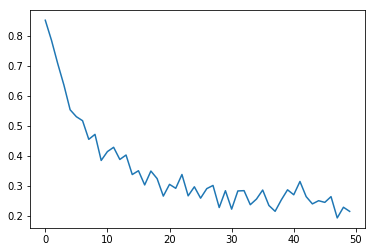

In [40]:
# Plot the evolution of the loss
pl.plot(J)

In [56]:
#################
# Testing phase #
#################

N = x_test.shape[0]  # number of samples
D = x_test.shape[1]  # dimension of input sample

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################
#w1_trained, b1_trained, w2_trained, b2_trained = sess.run([w1, b1, w2, b2])
# Build the computational graph
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, n_classes))
w1 = tf.placeholder(tf.float32, shape=w1_trained.shape)
b1 = tf.placeholder(tf.float32, shape=b1_trained.shape)
w2 = tf.placeholder(tf.float32, shape=w2_trained.shape)
b2 = tf.placeholder(tf.float32, shape=b2_trained.shape)

# define nodes for forward computation for hidden neurons h and output neurons y_pred
h = tf.matmul(x, w1) + b1
yhat = tf.nn.sigmoid(h)
y_pred = tf.sigmoid(tf.matmul(yhat, w2)+b2)


# Run the computational graph
with tf.Session() as sess:
    # define a dictionary of values that will be used to feed the placeholders of the graph
    # don't forget to pass in the trained weights and biases
    # values = ...
    # ask TensorFlow to compute the graph on the test set
    # values = { ... }
    # y_pred_test = sess.run(...)
    values = {x:x_test, y:y_test, w1:w1_trained, b1:b1_trained, w2:w2_trained, b2:b2_trained}
    y_pred_test = sess.run([y_pred], feed_dict=values)[0]

# At this stage, y_pred_test should contain the matrix of outputs on the test set with shape (N_test, 10)

In [57]:
# compute accuracy
y_winner = np.argmax(y_pred_test, axis=1)
N_test = y_winner.size
num_correct = (y_winner == y_test_vec).sum()
num_missed = N_test - num_correct
accuracy = num_correct * 1.0 / N_test
error_rate = num_missed * 1.0 / N_test
print('# correct  : ', num_correct)
print('# missed   : ', num_missed)
print('accuracy   :  %2.2f %%'% (accuracy*100.0))
print('error rate :  %2.2f %%'% (error_rate*100.0))

# correct  :  8966
# missed   :  1034
accuracy   :  89.66 %
error rate :  10.34 %
